In [1]:
# https://github.com/computervisioneng/image-segmentation-yolov8

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo'

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 31.5 MB/s eta 0:00:00


In [4]:
import os

from ultralytics import YOLO


model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

model.train(data='/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Models/config.yaml', epochs=2, imgsz=640)


100%|██████████| 6.73M/6.73M [00:00<00:00, 303MB/s]
Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Models/config.yaml, epochs=2, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None,

In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/labels/val.cache... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:37<00:00,  1.17it/s]
                   all        700        712      0.944      0.874      0.936      0.658       0.72      0.666      0.575       0.18
Speed: 1.3ms preprocess, 6.4ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/segment/val


array([    0.65805])

In [ ]:
import shutil

source_directory = '/content/runs'
destination_directory = '/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/YoloResults1'

shutil.copytree(source_directory, destination_directory)


'/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/YoloResults1'

In [6]:
#!scp -r /content/runs '/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/YoloResults'


In [8]:
 #Load a model
#model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

model = YOLO('/content/runs/segment/train/weights/best.pt')

# Run batched inference on a list of images
#results = model(['im1.jpg', 'im2.jpg'])  # return a list of Results objects
results = model(['/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/TestImages/image_2023-06-23_18-45-10-845684.png'])  # return a list of Results objects


# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Class probabilities for classification outputs


0: 640x640 1 fibre, 12.3ms
Speed: 4.3ms preprocess, 12.3ms inference, 29.2ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
import cv2
import numpy as np
import torch
from google.colab.patches import cv2_imshow


image 1/1 /content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/TestImages/image_2023-06-28_11-10-38-182192.png: 640x640 2 fibres, 11.1ms
Speed: 7.0ms preprocess, 11.1ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/TestImages/image_2023-06-28_11-10-38-182192.png


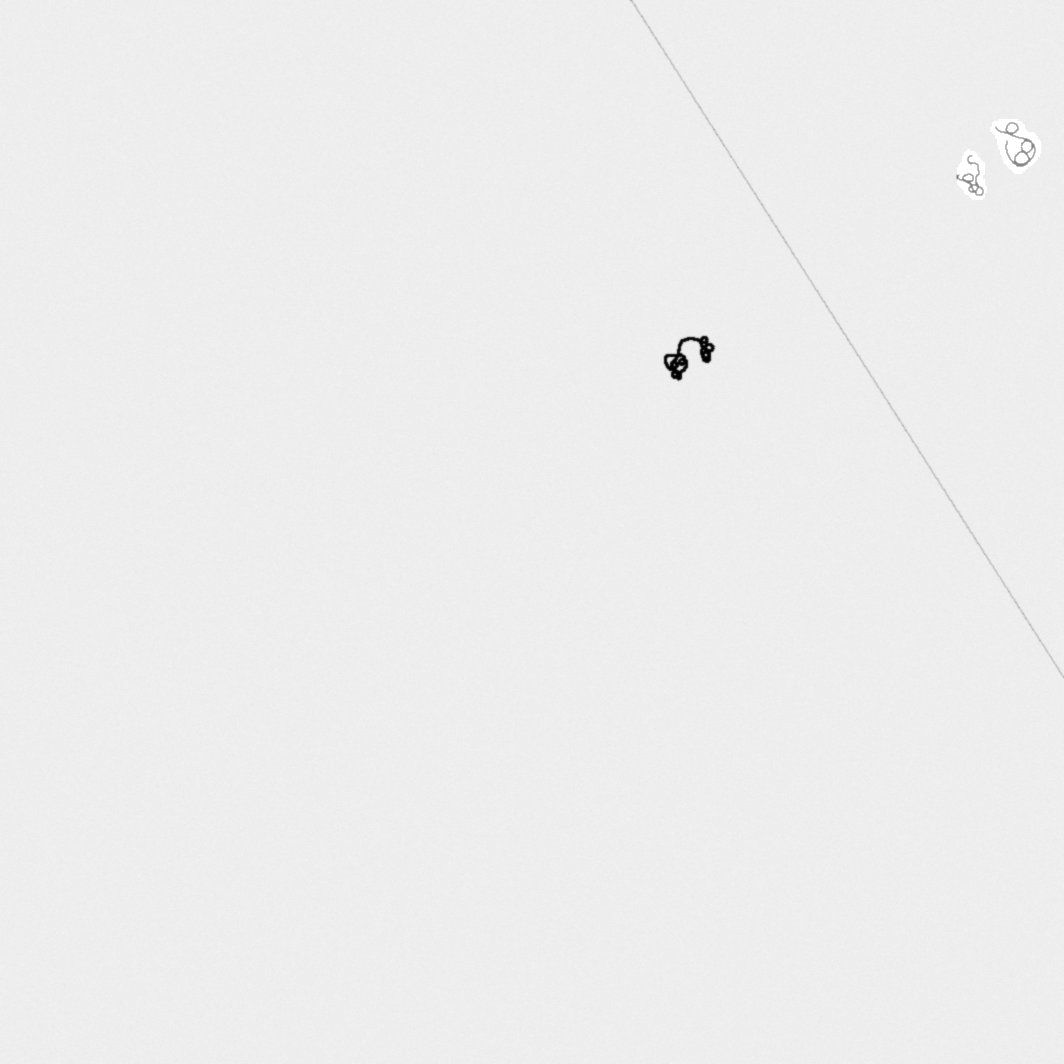

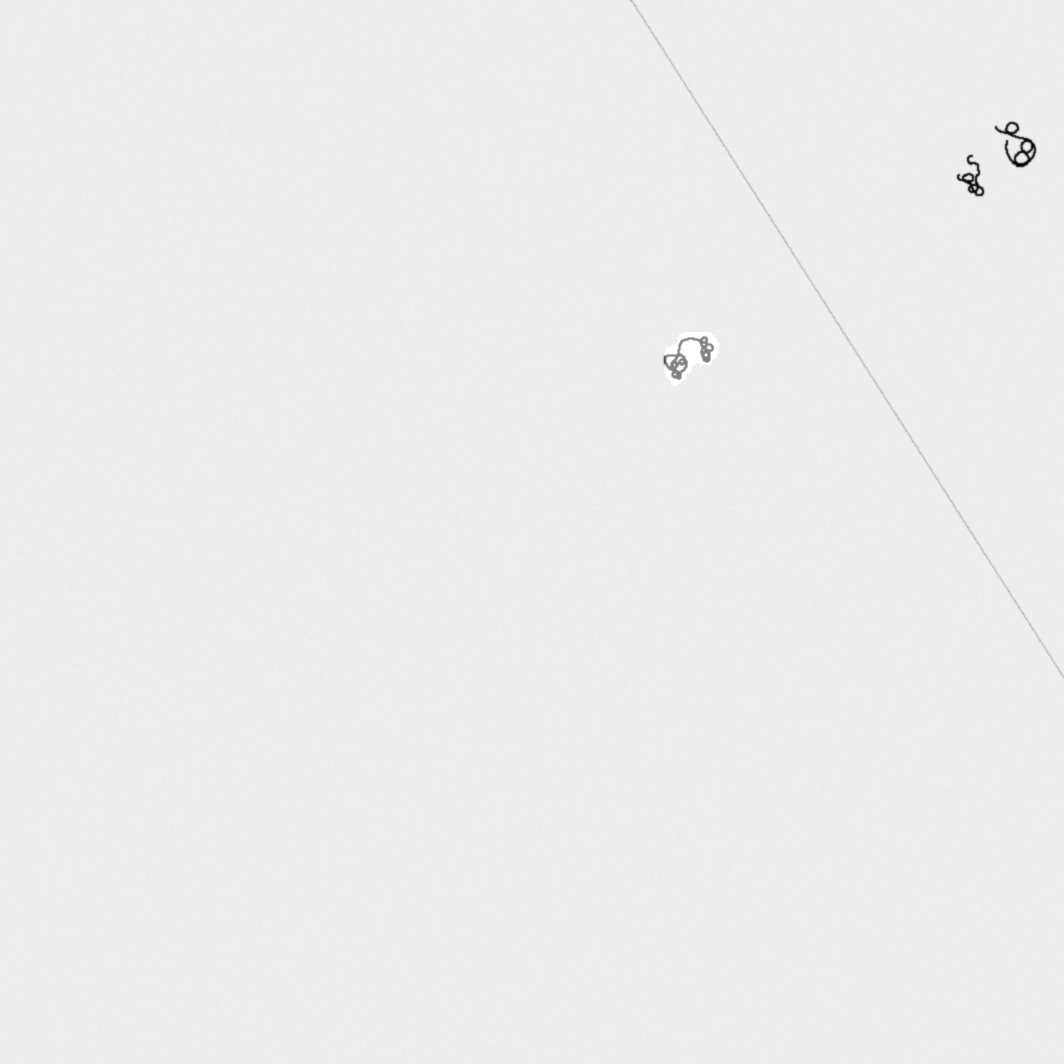

In [82]:
# Load the original image

#loadedImage = '/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/TestImages/image_2023-06-23_18-45-10-845684.png'

#loadedImage = '/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/TestImages/image_2023-06-23_18-45-22-199634.png'

#loadedImage = '/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/TestImages/manual.tif'

loadedImage = '/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/TestImages/image_2023-06-28_11-10-38-182192.png'
print(loadedImage)
results = model(loadedImage)
image = cv2.imread(loadedImage)  # Replace "path_to_image.jpg" with the actual path to your image

H, W , _ = image.shape

# Iterate over the results
for result in results:
#    boxes = result.boxes
#    masks = result.masks

    # Iterate over the masks in the current result
    for j, mask in enumerate(result.masks.data):
        # Convert the mask to a numpy array
      #  mask = mask.detach().cpu().numpy() * 255
      #  mask = cv2.resize(mask, (W,H))
      #  cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/FibreAnalysis/Data/synth/Yolo/TestImages/output.png',mask)

      #   # Move the mask tensor to CPU if it's on a CUDA device
         mask_np = mask.detach().cpu().numpy() if isinstance(mask, torch.Tensor) else mask


      #   # Convert the mask to a numpy array
         #mask_np = mask_cpu.numpy()

      #   # Convert the mask to uint8 and resize it to match the image size
         mask_np = cv2.resize((mask_np.astype(np.uint8) * 255), (image.shape[1], image.shape[0]))

      #   # Create a transparency mask
         transparency_mask = np.stack((mask_np,) * 3, axis=-1)
      #   transparency_mask = np.stack((np.zeros_like(mask_np), np.zeros_like(mask_np), mask_np), axis=-1)


      #   # Apply the mask overlay to the original image
         overlay = cv2.addWeighted(image, 1, transparency_mask, 0.5, 0)

      #   # Display the result
         cv2_imshow(overlay)
         cv2.waitKey(0)

# Close the OpenCV windows
cv2.destroyAllWindows()

In [58]:
#print(max((result.masks.data)astypeint))
print(torch.min(result.masks.data).item())

0.0


In [51]:
print(result.boxes.data)

tensor([[2.0920e+01, 1.3505e+03, 1.4036e+02, 1.4097e+03, 3.3448e-01, 0.0000e+00],
        [1.5738e+01, 1.3011e+03, 1.4099e+02, 1.4124e+03, 2.8520e-01, 0.0000e+00]], device='cuda:0')
